<a href="https://colab.research.google.com/github/duonghiepit/svm-classification-regression/blob/main/svm_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Classifier (SVC)**

In [11]:
# Tải dataset
!gdown 1T4oy9neutVe2egrEcnjhKwAdHJCyDcJ6

Downloading...
From: https://drive.google.com/uc?id=1T4oy9neutVe2egrEcnjhKwAdHJCyDcJ6
To: /content/breast-cancer.csv
100% 24.4k/24.4k [00:00<00:00, 54.4MB/s]


In [12]:
# Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# Đọc dữ liệu

dataset_path = './breast-cancer.csv'
df = pd.read_csv(
    dataset_path,
    names=[
        'age',
        'meonpause',
        'tumor-size',
        'inv-nodes',
        'node-caps',
        'deg-malig',
        'breast',
        'breast-quad',
        'irradiat',
        'label'
    ]
)

Sau khi đọc, DataFrame của chúng ta sẽ có dạng như sau:

In [14]:
df.head()

,age,meonpause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,label
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [8]:
df['label'].value_counts()

'no-recurrence-events'    201
'recurrence-events'        85
Name: label, dtype: int64

Bên cạnh đó, ta cũng có thể kiểm tra một số thông tin khác của bộ dữ liệu sử dụng **df.info()**,
đạt kết quả như sau:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   meonpause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   label        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [24]:
df.describe()

,age,meonpause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,label
count,286,286,286,286,286,286,286,286,286,286
unique,6,3,11,7,2,3,2,5,2,2
top,'50-59','premeno','30-34','0-2','no','2','left','left_low','no','no-recurrence-events'
freq,96,150,60,213,230,130,152,111,218,201


## Tiền xử lý dữ liệu



---
Quan sát bộ dữ liệu trên, có thể nhận ra bộ dữ liệu hiện tại có nhiều vấn đề cần chúng ta giải quyết trước khi đưa vào huấn luyện. Trong đó, dễ thấy chúng ta cần phải mã hóa các cột dữ liệu dạng categorical và giải quyết các missing values. Các bước thực hiện như sau:


### Filling missing values

Từ kết quả **df.info()**, ta có thể thấy các cột thuộc tính *nodecaps* và breast-quad đang không có đủ 286 non-null values, đồng nghĩa rằng hai cột này đang chứa missing values. Việc giải quyết vấn đề này sẽ có rất nhiều cách, song để đơn giản hóa vấn đề, chúng ta sẽ áp dụng chiến lược khỏa lắp các missing values bằng giá trị xuất hiện nhiều nhất trong cột tương ứng. Ta thực hiện như sau:

In [25]:
df['node-caps'] = df['node-caps'].fillna(
    df['node-caps'].mode()[0]
)

In [26]:
df['breast-quad'] = df['breast-quad'].fillna(
    df['breast-quad'].mode()[0]
)

Phương thức **mode()** trả về giá trị xuất hiện nhiều nhất trong cột. Nếu có nhiều hơn một giá trị có tần suất xuất hiện cao nhất, phương thức này sẽ trả về tất cả các giá trị đó dưới dạng Series. Do đó, [0] được sử dụng để lấy giá trị đầu tiên trong series.

In [27]:
df.head()

,age,meonpause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,label
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


### Encode categorical features



---


Toàn bộ các cột thuộc tính của bộ dữ liệu đều ở dạng
categorical. Vì vậy, ta cần mã hóa chúng thành dạng số trước khi đưa vào huấn luyện mô hình. Để thực hành các kiểu encode khác nhau, trong bài này chúng ta sẽ sử dụng cả hai OneHotEncoder() và OrdinalEncoder() cho một số cột thuộc tính khác nhau. Đầu tiên, ta tách các cột features và label thành hai biến riêng:

In [29]:
y = df['label']
X = df.drop(columns=('label'), axis=1)

Tiếp đến, ta xác định tên các cột sẽ sử dụng OrdinalEncoder() và các cột sẽ sử dụng OneHotEncoder():

In [41]:
X.describe()

,age,meonpause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,286,286,286,286,286,286,286,286,286
unique,6,3,11,7,2,3,2,5,2
top,'50-59','premeno','30-34','0-2','no','2','left','left_low','no'
freq,96,150,60,213,230,130,152,111,218


In [39]:
non_rank_features = ['meonpause', 'node-caps', 'breast', 'breast-quad', 'irradiat']
rank_features = ['age', 'tumor-size', 'inv-nodes', 'deg-malig']

Chúng ta sẽ sử dụng đồng thời hai Encoder này thông qua ColumnTransformer() của sklearn như sau:

In [45]:
transformer = ColumnTransformer(
    transformers=[
        ("OneHot", OneHotEncoder(drop='first'), non_rank_features),
        ("Ordinal", OrdinalEncoder(), rank_features)
    ],
    remainder='passthrough'
)

X_transformed = transformer.fit_transform(X)

Như vậy ta đã encode xong các thuộc tính. Để có thể quan sát dữ liệu sau khi encode một cách trực quan, ta sẽ biến đổi biến X_transformed thành DataFrame như sau:

In [46]:
onehot_features = transformer.named_transformers_['OneHot'].get_feature_names_out(non_rank_features)
all_features = onehot_features.tolist() + rank_features

X_encoded = pd.DataFrame(
    X_transformed,
    columns=all_features
)

Chúng ta có thể quan sát sự thay đổi của bộ dữ liệu thông qua hàm sau:

In [48]:
X_encoded.head(3)

,meonpause_'lt40',meonpause_'premeno',node-caps_'yes',breast_'right',breast-quad_'left_low',breast-quad_'left_up',breast-quad_'right_low',breast-quad_'right_up',irradiat_'yes',age,tumor-size,inv-nodes,deg-malig
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,1.0


### Encode label

---
Label của bộ dữ liệu gồm có hai giá trị (class) là **"recurrence-events"**
và **"no-recurrence-events"**. Tương tự như categorical features, ta cũng cần phải đưa label này về dạng số. Trong sklearn, ta có LabelEncoder() chuyên dùng để encode các label. Cách sử dụng như sau:


In [49]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Normalization

---
Cuối cùng, để thuận tiện trong việc training, ta cũng áp dụng kỹ thuật
chuẩn hóa dữ liệu vào các thuộc tính X như sau:


In [51]:
normalize = StandardScaler()
X_normalized = normalize.fit_transform(X_encoded)

## Chia tập dữ liệu train, val



---
Sau khi hoàn tất tiền xử lý, ta bắt đầu phân chia tập dữ liệu ban đầu thành hai tập con. Một tập "train" dùng cho việc huấn luyện mô hình, một tập "val" dùng để đánh giá mô hình sau khi train. Tỉ lệ chia ở đây sẽ là 7:3.


In [54]:
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y_encoded,
    test_size=0.3,
    random_state=1,
    shuffle=True
)

## Huấn luyện mô hình



---

Ta huấn luyện mô hình SVM trên tập train:

In [55]:
classifier = SVC(
    random_state=1
)
classifier.fit(X_train, y_train)

SVC(random_state=1)

## Đánh giá mô hình



---
Với mô hình đã huấn luyện, ta sẽ kiểm tra hiệu năng của nó thông qua
đánh giá trên tập val:


In [56]:
y_pred = classifier.predict(X_val)
scores = accuracy_score(y_pred, y_val)

print('Evaluation results on validation set:')
print(f'Accuracy: {scores}')

Evaluation results on validation set:
Accuracy: 0.627906976744186


# **Support Vector Regression (SVR)**



---

## Tải bộ dữ liệu

In [57]:
!gdown 1PhfXJRPWHFGlcVOz_OCOM80SOUWzEmk5

Downloading...
From: https://drive.google.com/uc?id=1PhfXJRPWHFGlcVOz_OCOM80SOUWzEmk5
To: /content/auto-insurance.csv
100% 495/495 [00:00<00:00, 1.73MB/s]


## Import các thư viện cần thiết

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Đọc bộ dữ liệu

In [60]:
dataset_path = './auto-insurance.csv'
df = pd.read_csv(
    dataset_path,
    names=[
        'n_claims',
        'total_payment'
    ]
)

In [61]:
df.head(3)

,n_claims,total_payment
0,108,392.5
1,19,46.2
2,13,15.7


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   n_claims       63 non-null     int64  
 1   total_payment  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [64]:
df.describe()

,n_claims,total_payment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


Vì bộ dữ liệu chỉ có một thuộc tính, ta hoàn toàn có thể trực quan bộ dữ liệu này lên đồ thị như sau:

[]

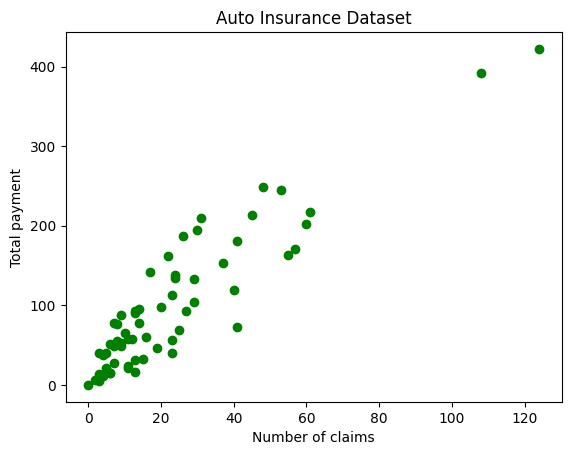

In [66]:
plt.scatter(df['n_claims'], df['total_payment'], color='green')
plt.title('Auto Insurance Dataset')
plt.xlabel('Number of claims')
plt.ylabel('Total payment')
plt.plot()

## Chuẩn hóa số liệu

In [67]:
normalizer = StandardScaler()
df_normalized = normalizer.fit_transform(df)

## Chia bộ dữ liệu tran, val

In [72]:
X, y = df_normalized[:, 0], df_normalized[:, 1]
X = X.reshape(-1, 1)

In [78]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    shuffle=True
)

## Huấn luyện mô hình

In [79]:
regression = SVR()
regression.fit(X_train, y_train)

SVR()

## Đánh giá mô hình

In [80]:
y_pred = regression.predict(X_val)
mae = mean_absolute_error(y_pred, y_val)
mse = mean_squared_error(y_pred, y_val)

print('Evaluation result on validation set:')
print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')

Evaluation result on validation set:
Mean absolute error: 0.4549655045116023
Mean squared error: 0.5406791138567528
